In [114]:
#Dependencies
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import balanced_accuracy_score, r2_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import tensorflow as tf

In [115]:
#read csv into df
df = pd.read_csv("../Levels_Fyi_Salary_Data 2.csv")
# columns to drop... salary_currency, salary, work_year
df.sample(25)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
52834,5/29/2021 15:49:53,Lam Research,L3,Hardware Engineer,167000,"Fremont, CA",1.0,1.0,Systems,135000.0,...,1,0,0,0,1,0,0,0,White,PhD
2889,11/24/2018 14:01:02,Google,PM 1,Product Manager,215000,"Sunnyvale, CA",7.0,1.0,Full Stack,135000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
9870,8/19/2019 18:23:03,Google,L4,Product Designer,230000,"New York, NY",8.0,0.0,UX,147000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
26641,8/15/2020 14:50:48,Tesla,P3,Mechanical Engineer,223000,"Palo Alto, CA",12.0,2.0,Product,143000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
31109,9/27/2020 9:42:07,DocuSign,M5,Marketing,461000,"San Francisco, CA",8.0,4.0,Enterprise,185000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
54095,6/10/2021 13:44:07,JPMorgan Chase,601,Software Engineer,118000,"Chicago, IL",3.0,3.0,Distributed Systems (Back-End),106000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
26016,8/8/2020 9:52:33,The D. E. Shaw Group,1,Software Engineer,250000,"New York, NY",1.0,0.0,API Development (Back-End),100000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
28999,9/5/2020 10:02:44,Microsoft,61,Software Engineer,185000,"Atlanta, GA",2.0,0.0,Distributed Systems (Back-End),120000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
10562,9/10/2019 4:12:36,Mozilla,P3: Senior Software Engineer,Software Engineer,118000,"Toronto, ON, Canada",12.0,7.0,Full Stack,98000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
57432,7/12/2021 16:47:36,Siemens,7,Business Analyst,100000,"Lexington, KY",3.0,2.0,Sales,99000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree


In [116]:
df.nunique()


timestamp                  62561
company                     1631
level                       2923
title                         15
totalyearlycompensation      893
location                    1050
yearsofexperience             65
yearsatcompany                81
tag                         3058
basesalary                   482
stockgrantvalue              612
bonus                        335
gender                         4
otherdetails               12841
cityid                      1045
dmaid                        149
rowNumber                  62642
Masters_Degree                 2
Bachelors_Degree               2
Doctorate_Degree               2
Highschool                     2
Some_College                   2
Race_Asian                     2
Race_White                     2
Race_Two_Or_More               2
Race_Black                     2
Race_Hispanic                  2
Race                           5
Education                      5
dtype: int64

In [117]:
titles_df = df[df["title"]=="Data Scientist"]
titles_df


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
419,6/5/2018 14:06:30,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
440,6/8/2018 9:49:25,Microsoft,64,Data Scientist,218000,"Seattle, WA",11.0,11.0,ML / AI,165000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
444,6/8/2018 17:55:09,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
454,6/10/2018 19:39:35,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
495,6/17/2018 11:39:38,Facebook,5,Data Scientist,370000,"Seattle, WA",8.0,3.0,NaN,190000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62240,3/26/2019 17:25:02,IBM,8,Data Scientist,155000,"Washington, DC",5.0,2.0,ML / AI,141000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62283,6/17/2018 21:07:18,Facebook,E3,Data Scientist,150000,"Singapore, SG, Singapore",0.0,0.0,ML / AI,150000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62285,7/16/2018 20:11:40,ADP,Sr UX Researcher 4,Data Scientist,185000,"Roseland, NJ",8.0,2.0,UX Research,150000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62529,6/12/2018 20:54:06,Google,T6,Data Scientist,685000,"Kirkland, WA",22.0,2.0,ML / AI,221000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [118]:
#Binning years of experience for better encoding
titles_df['yearsofexperience'].value_counts()



2.0     351
5.0     343
3.0     314
4.0     301
1.0     214
0.0     190
6.0     178
7.0     141
10.0    132
8.0     124
9.0      64
15.0     45
12.0     42
11.0     37
13.0     25
20.0     21
16.0     18
14.0     15
17.0      6
18.0      4
25.0      4
23.0      2
22.0      2
19.0      1
26.0      1
30.0      1
21.0      1
34.0      1
Name: yearsofexperience, dtype: int64

In [119]:
# # Replace in dataframe
# years_labels = []
# for years in titles_df['yearsofexperience']:
#     if years == 0.0:
#         years = "Entry Level"
#     elif years < 5.0:
#         years = "Early Career"
#     elif (years>=5.0 and years <10.0):
#         years = "Mid level"
#     else:
#         years = "Senior"
#     years_labels.append(years)
# years_labels

In [120]:
#reassign company column to bin name
year_level_df = titles_df.copy()
# year_level_df['yearsofexperience'] = years_labels
year_level_df.sample(20)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
34957,11/10/2020 14:42:51,Facebook,IC3,Data Scientist,180000,"Menlo Park, CA",2.0,2.0,Data,130000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
57483,7/13/2021 1:31:52,DAZN Group,L3,Data Scientist,61000,"Amsterdam, NH, Netherlands",3.0,1.0,machine learning,61000.0,...,0,0,0,0,1,0,0,0,White,Master's Degree
15549,1/24/2020 20:14:17,McKinsey,Business Analyst,Data Scientist,100000,"Chicago, IL",0.0,0.0,ML / AI,85000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
13662,12/4/2019 6:31:46,Liberty Mutual,18,Data Scientist,184000,"Seattle, WA",7.0,6.0,ML / AI,160000.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree
9897,8/20/2019 11:19:32,Microsoft,63,Data Scientist,288000,"Redmond, WA",6.0,3.0,Data and Applied Scinece,165000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
46194,3/26/2021 18:01:32,Intel,Grade 5,Data Scientist,107000,"Hillsboro, OR",5.0,5.0,RET Design Engineer,91000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
22959,6/23/2020 10:01:41,PayPal,26,Data Scientist,232000,"San Jose, CA",6.0,0.0,Full Stack,171000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
5581,4/6/2019 22:40:06,Amazon,L5,Data Scientist,294000,"Seattle, WA",1.0,0.0,ML / AI,160000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
50927,5/9/2021 19:59:24,Bayer,VS 1.3,Data Scientist,205000,"Berkeley, CA",6.0,0.0,General,165000.0,...,1,0,0,0,1,0,0,0,White,PhD
50131,5/1/2021 0:56:03,Microsoft,61,Data Scientist,57000,"Hyderabad, AP, India",10.0,0.0,Business Analytics,45000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [121]:
year_level_df['yearsofexperience'].value_counts()

2.0     351
5.0     343
3.0     314
4.0     301
1.0     214
0.0     190
6.0     178
7.0     141
10.0    132
8.0     124
9.0      64
15.0     45
12.0     42
11.0     37
13.0     25
20.0     21
16.0     18
14.0     15
17.0      6
18.0      4
25.0      4
23.0      2
22.0      2
19.0      1
26.0      1
30.0      1
21.0      1
34.0      1
Name: yearsofexperience, dtype: int64

In [122]:
# salary_outliers = year_level_df[year_level_df['totalyearlycompensation']>=800000]
# salary_outliers

In [123]:
clean_df= year_level_df.drop(columns=['timestamp', 'level', 'yearsatcompany', 'otherdetails','Highschool', 'Some_College', 
                               'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
                              'Race_Hispanic', 'Race', 'Education','cityid','dmaid','rowNumber','tag','bonus','stockgrantvalue','basesalary','title'])
clean_df.head()
#get_dummies/oneHotEncoder on company size and employment type

,company,totalyearlycompensation,location,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree
419,LinkedIn,233000,"San Francisco, CA",4.0,Male,0,0,0
440,Microsoft,218000,"Seattle, WA",11.0,Male,0,0,0
444,ebay,180000,"San Jose, CA",10.0,Female,0,0,0
454,Twitter,500000,"San Francisco, CA",4.0,Male,0,0,0
495,Facebook,370000,"Seattle, WA",8.0,Male,0,0,0


In [124]:
# salary_outliers = clean_df[clean_df['totalyearlycompensation']>=800000]
# salary_outliers

In [125]:
import re
form_state_one = r'(\w+\s)*(\w+),\s([A-Z]{2})$'
matches_form_one = clean_df.location.str.contains(form_state_one, flags=re.IGNORECASE, na=False)
no_form_one = clean_df.location.str.contains(form_state_one, flags=re.IGNORECASE, na=False).sum()
print(no_form_one)

form_state_two = r'(\w+\s)*(\w+),\s([A-Z]{2}),\s(\w+)'
matches_form_two = clean_df.location.str.contains(form_state_two, flags=re.IGNORECASE, na=False)
no_form_two = clean_df.location.str.contains(form_state_two, flags=re.IGNORECASE, na=False).sum()
print(no_form_two)


clean_df.location[~matches_form_one & ~matches_form_two]

2226
351


/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


9061    Tel Aviv, Israel
Name: location, dtype: object

In [126]:
clean_df.head()

,company,totalyearlycompensation,location,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree
419,LinkedIn,233000,"San Francisco, CA",4.0,Male,0,0,0
440,Microsoft,218000,"Seattle, WA",11.0,Male,0,0,0
444,ebay,180000,"San Jose, CA",10.0,Female,0,0,0
454,Twitter,500000,"San Francisco, CA",4.0,Male,0,0,0
495,Facebook,370000,"Seattle, WA",8.0,Male,0,0,0


In [127]:
def US_location_to_state(city):
    # if input is of the form $###,###,###
    if re.match(form_state_one, city, flags=re.IGNORECASE):

        # remove city name and commas
        state = re.sub('(\w+\s)*(\w+),\s','', city)
        
        # return state
        return state
    # otherwise, return NaN
    else:
        return np.nan
    

def location_to_city(city):
    # if input is of the form $###,###,###
    if re.match(form_state_one, city, flags=re.IGNORECASE):

        # remove city name and commas
        city = re.sub(',\s([A-Z]{2})$','', city)
        
        # return state
        return city
    # otherwise, return NaN
    else:
        return np.nan
clean_df = clean_df.loc[clean_df.location != "Tel Aviv, Israel"]
clean_df


,company,totalyearlycompensation,location,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree
419,LinkedIn,233000,"San Francisco, CA",4.0,Male,0,0,0
440,Microsoft,218000,"Seattle, WA",11.0,Male,0,0,0
444,ebay,180000,"San Jose, CA",10.0,Female,0,0,0
454,Twitter,500000,"San Francisco, CA",4.0,Male,0,0,0
495,Facebook,370000,"Seattle, WA",8.0,Male,0,0,0
...,...,...,...,...,...,...,...,...
62240,IBM,155000,"Washington, DC",5.0,Male,0,0,0
62283,Facebook,150000,"Singapore, SG, Singapore",0.0,Female,0,0,0
62285,ADP,185000,"Roseland, NJ",8.0,Male,0,0,0
62529,Google,685000,"Kirkland, WA",22.0,Male,0,0,0


In [128]:
clean_df['state'] = clean_df.location.str.extract(f'({form_state_one}|{form_state_two})', flags=re.IGNORECASE)[0].apply(US_location_to_state)

In [129]:
clean_df = clean_df[clean_df['state'].notna()]
clean_df.head()

,company,totalyearlycompensation,location,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,state
419,LinkedIn,233000,"San Francisco, CA",4.0,Male,0,0,0,CA
440,Microsoft,218000,"Seattle, WA",11.0,Male,0,0,0,WA
444,ebay,180000,"San Jose, CA",10.0,Female,0,0,0,CA
454,Twitter,500000,"San Francisco, CA",4.0,Male,0,0,0,CA
495,Facebook,370000,"Seattle, WA",8.0,Male,0,0,0,WA


In [130]:
clean_df['city'] = clean_df.location.str.extract(f'({form_state_one})', flags=re.IGNORECASE)[0].apply(location_to_city)
clean_df.drop('location', axis=1, inplace=True)
clean_df.head()

/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,company,totalyearlycompensation,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,state,city
419,LinkedIn,233000,4.0,Male,0,0,0,CA,San Francisco
440,Microsoft,218000,11.0,Male,0,0,0,WA,Seattle
444,ebay,180000,10.0,Female,0,0,0,CA,San Jose
454,Twitter,500000,4.0,Male,0,0,0,CA,San Francisco
495,Facebook,370000,8.0,Male,0,0,0,WA,Seattle


In [149]:
##for gender back in to later models
clean_df_gender = clean_df.copy()
#testing predicatbility of salary threshhold (600000-50.1)
clean_gender2 = clean_df_gender[clean_df_gender['totalyearlycompensation']<600000]
clean_gender2.gender.value_counts()

Male      1128
Female     322
Other       18
Name: gender, dtype: int64

In [17]:
clean_df.drop(columns=['gender'], inplace=True)
clean_df.nunique()

/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


company                    397
totalyearlycompensation    375
yearsofexperience           28
Masters_Degree               2
Bachelors_Degree             2
Doctorate_Degree             2
state                       39
city                       159
dtype: int64

In [18]:
print(clean_df["company"].value_counts().head(10))

Amazon          224
Microsoft       202
Facebook        175
Google           83
Apple            75
Uber             60
IBM              58
Capital One      44
LinkedIn         34
Walmart Labs     33
Name: company, dtype: int64


In [19]:
# #Binning he companies- .cut with 4 bins...do we want to specifically design these?
# bin_labels = ['Small', 'Medium', 'Large']
# bins3 = clean_df['company'].value_counts()
# company_bins = pd.cut(bins3, labels=bin_labels).to_list()#does this solve the issue of imbalanced data?
# company_bins

In [20]:
#Binning he companies- .cut with 4 bins...do we want to specifically design these?
bin_labels = ['Small', 'Medium', 'Large', 'Very Large']
bins4 = clean_df['company'].value_counts()
company_bins = pd.cut(bins4, bins=4, labels=bin_labels).to_list()#does this solve the issue of imbalanced data?
company_bins


['Very Large',
 'Very Large',
 'Very Large',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 

In [21]:
#change company name to bin name
companies = []
for company in clean_df['company']:
    if company == "Amazon" or company == "Microsoft" or company == "Facebook":
        company = "Large"
    elif company == "Google" or company == "Apple" or company == "IBM" or company=="Uber":
        company = "Medium"
    else:
        company = "Small"
    companies.append(company)

In [22]:
#reassign company column to bin name
clean_bins_df = clean_df.copy()
clean_bins_df['company'] = companies
# clean_bins_df.drop(columns=['Doctorate_Degree'], inplace=True)
# clean_bins_df.drop(columns=['city'], inplace=True)
clean_bins_df.head(10)
# clean_bins_df['gender'].value_counts()

,company,totalyearlycompensation,yearsofexperience,Masters_Degree,Bachelors_Degree,Doctorate_Degree,state,city
419,Small,233000,4.0,0,0,0,CA,San Francisco
440,Large,218000,11.0,0,0,0,WA,Seattle
444,Small,180000,10.0,0,0,0,CA,San Jose
454,Small,500000,4.0,0,0,0,CA,San Francisco
495,Large,370000,8.0,0,0,0,WA,Seattle
499,Large,200000,3.0,0,0,0,WA,Seattle
509,Large,340000,11.0,0,0,0,WA,Bellevue
510,Medium,690000,10.0,0,0,0,WA,Kirkland
513,Small,600000,3.0,0,0,0,CA,Los Gatos
523,Small,168000,8.0,0,0,0,CA,Palo Alto


In [23]:
# salary_outliers = clean_bins_df[clean_bins_df['totalyearlycompensation']>=800000]
# salary_outliers

In [24]:
# #is there linearity between location numerical representation and salary?
# clean_bins2 = clean_bins_df.drop(['location'], axis = 1)
# locations = clean_bins_df['location']
# clean_bins2.head()

In [25]:
# #Create label Encoder and encode categorical
# from sklearn.preprocessing import LabelEncoder
# lb_make = LabelEncoder()
# clean_bins2['company']= lb_make.fit_transform(clean_bins2['company'])
# clean_bins2['gender']= lb_make.fit_transform(clean_bins2['gender'])

# clean_bins2.head()

In [26]:
# clean_bins2['gender'].value_counts() #what do we do with 4 genders?

In [27]:
# #OneHot to new categories
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(sparse=False)
# company_encoded = lb_make.fit_transform(clean_bins2['company'])
# company_encoded = company_encoded.reshape(len(company_encoded), 1)
# onehot_company_encoded = enc.fit_transform(company_encoded)
# print(onehot_company_encoded)

In [28]:
#skip procedural encoding with get_dummies()?
# clean_dummies = clean_dummies.drop(['gender_2'], axis=1)
clean_dummies = pd.get_dummies(data=clean_bins_df, columns=['company', 'city', 'state', 'yearsofexperience'], drop_first=True)#drop the gender columns?

clean_dummies.head(15)

,totalyearlycompensation,Masters_Degree,Bachelors_Degree,Doctorate_Degree,company_Medium,company_Small,city_Alexandria,city_Alpharetta,city_Ann Arbor,city_Annapolis Junction,...,yearsofexperience_18.0,yearsofexperience_19.0,yearsofexperience_20.0,yearsofexperience_21.0,yearsofexperience_22.0,yearsofexperience_23.0,yearsofexperience_25.0,yearsofexperience_26.0,yearsofexperience_30.0,yearsofexperience_34.0
419,233000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,218000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,180000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,500000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,370000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
509,340000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,690000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513,600000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,168000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
salary_outliers = clean_dummies[clean_dummies['totalyearlycompensation']>=800000]
salary_outliers

,totalyearlycompensation,Masters_Degree,Bachelors_Degree,Doctorate_Degree,company_Medium,company_Small,city_Alexandria,city_Alpharetta,city_Ann Arbor,city_Annapolis Junction,...,yearsofexperience_18.0,yearsofexperience_19.0,yearsofexperience_20.0,yearsofexperience_21.0,yearsofexperience_22.0,yearsofexperience_23.0,yearsofexperience_25.0,yearsofexperience_26.0,yearsofexperience_30.0,yearsofexperience_34.0
4204,900000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34136,800000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52222,1000000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X = clean_dummies.drop(columns=["totalyearlycompensation"])
y = clean_dummies["totalyearlycompensation"]
X.shape
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.489291206846292
Testing Score: -3.134801351650873e+22


In [33]:
#LinReg basically could not do better than true random... testing random Forest Regressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=42)

In [35]:
Y_pred = regressor.predict(X_test)  # test the output by changing values


In [36]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(f"R2 Score: {sklearn.metrics.r2_score(y_test, Y_pred)}")

Training Score: 0.7505850800775655
Testing Score: 0.25595378396537805
R2 Score: 0.25595378396537805


In [37]:
# RFR model looks pretty good... 
#could we use cross validation and/or decision trees to determine which features are not contributing to the model
#then tune by removing these noise contributors

In [38]:
#neural network?- go back to clean_bins_df
# Generate our categorical variable lists
app_cats = clean_bins_df.dtypes[clean_bins_df.dtypes == "object"].index.tolist()
clean_bins_df[app_cats].nunique()

company      3
state       39
city       159
dtype: int64

In [39]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(clean_bins_df[app_cats]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cats)
encode_df.head()

/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,company_Large,company_Medium,company_Small,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,...,city_Walnut Creek,city_Waltham,city_Warren,city_Washington,city_Watertown,city_Wellesley,city_West McLean,city_Wilmington,city_Woonsocket,city_Worcester
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Merge one-hot encoded features and drop the originals
clean_bins_df = clean_bins_df.merge(encode_df, left_index=True, right_index = True)
clean_bins_df.drop(app_cats,1, inplace=True)
clean_bins_df.head()

/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,totalyearlycompensation,yearsofexperience,Masters_Degree,Bachelors_Degree,Doctorate_Degree,company_Large,company_Medium,company_Small,state_AL,state_AR,...,city_Walnut Creek,city_Waltham,city_Warren,city_Washington,city_Watertown,city_Wellesley,city_West McLean,city_Wilmington,city_Woonsocket,city_Worcester
419,233000,4.0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,218000,11.0,0,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444,180000,10.0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,500000,4.0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495,370000,8.0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
clean_bins_df.totalyearlycompensation.values

array([233000, 218000, 180000, 500000, 370000, 200000, 340000, 690000,
       600000, 168000, 187000, 225000, 220000, 130000, 112000, 200000,
       120000, 500000, 220000, 147000, 340000, 235000, 206000, 233000,
       149000, 356000, 305000, 200000, 215000, 700000, 243000, 260000,
       240000, 300000, 160000, 220000, 210000, 210000, 115000, 115000,
       188000, 215000, 315000, 240000, 230000, 216000, 125000, 322000,
       400000, 157000,  82000, 120000, 240000, 100000, 114000, 119000,
       250000, 182000, 120000, 318000, 135000, 228000, 137000, 156000,
       193000, 350000])

In [42]:
# Split our preprocessed data into our features and target arrays
y = clean_bins_df.totalyearlycompensation.values
X = clean_bins_df.drop(columns=['totalyearlycompensation'])
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
#  Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
# hidden_nodes_layer2 = 20
# hidden_nodes_layer3 = 14

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# #Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                2060      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,071
Trainable params: 2,071
Non-trainable params: 0
_________________________________________________________________


2022-03-26 15:18:28.510163: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 


2022-03-26 15:18:32.400240: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/50
2/2 [==============================] - 0s 3ms/step - loss: -162760.7188 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: -307403.2917 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 14ms/step - loss: -312970.3438 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 10ms/step - loss: -319687.0573 - accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: -554736.6667 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: -751235.8542 - accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 22ms/step - loss: -839684.5417 - accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: -719185.5000 - accuracy: 0.0000e+00
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: -819036.0417 - accuracy: 0.0000e+00
Epoch 10/50
2/2 [==========================

In [47]:
#RF?
#Create variables from df
# Split our preprocessed data into our features and target arrays
y = clean_bins_df.totalyearlycompensation.values
X = clean_bins_df.drop(columns=['totalyearlycompensation'])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/50
2/2 [==============================] - 0s 3ms/step - loss: 1479053.5000 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 1455603.4167 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 30ms/step - loss: 1360177.3750 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 1280497.1667 - accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 1284928.9583 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 11ms/step - loss: 1095722.5625 - accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 1141892.5000 - accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 1103955.1667 - accuracy: 0.0000e+00
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 873264.8958 - accuracy: 0.0000e+00
Epoch 10/50
2/2 [============================

In [49]:
# Stratified kfolds cross validation
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets

In [50]:
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [51]:
# Create  classifier object.
lr = linear_model.LogisticRegression()

In [52]:
#  Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
lst_accu_stratified = []

In [53]:
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


In [54]:
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.030303030303030304, 0.0]

Maximum Accuracy That can be obtained from this model is: 3.0303030303030303 %

Minimum Accuracy: 0.0 %

Overall Accuracy: 1.5151515151515151 %

Standard Deviation is: 0.02142747821777417


In [55]:
# Split our preprocessed data into our features and target arrays
y = clean_bins_df.totalyearlycompensation.values
X = clean_bins_df.drop(columns=['totalyearlycompensation'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [57]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
# cross validation
from sklearn.model_selection import cross_validate
from sklearn import datasets, linear_model
linreg = LinearRegression()
scoring = "balanced_accuracy"
linscores = cross_validate(linreg, X_train, y_train, scoring=scoring, return_estimator=True)

/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/e140563/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 1949, in balanced_accuracy_score
    C = confusion_matrix(y_true, y_pred, 

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.38440328337008167
Testing Score: -0.9589725205229851


In [60]:
#trying random forest with c-v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [61]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=42)

In [62]:
Y_pred = regressor.predict(X_test)  # test the output by changing values
Y_pred

array([261192.91666667, 194261.25      , 231481.25      , 360621.66666667,
       180636.25      , 337295.        , 194388.33333333, 227260.83333333,
       242731.25      , 154710.        , 233711.25      , 352455.        ,
       204303.33333333, 192598.33333333])

In [63]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7715314293139572
Testing Score: -1.6626956999737725


In [64]:
clean_bins_new = clean_dummies.copy()
clean_bins_new = clean_bins_new[clean_bins_new['totalyearlycompensation']<800000]#got rid of the three outliers
# clean_bins_df['totalyearlycompensation'].nunique()
clean_bins_new['totalyearlycompensation'].nunique()

372

In [65]:
# Split our preprocessed data into our features and target arrays
y = clean_bins_new.totalyearlycompensation.values
X = clean_bins_new.drop(columns=['totalyearlycompensation'])

In [66]:
#trying random forest with c-v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [67]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=42)

In [68]:
Y_pred = regressor.predict(X_test)  # test the output by changing values
Y_pred

array([195331.47009935, 154327.66666667, 266427.52242128, 330432.5       ,
       332934.30916306, 299103.68935231, 240311.25      , 266427.52242128,
       234351.51517927, 131671.88095238, 334282.29166667, 428061.90069979,
       146749.39554739, 161651.40521978, 217601.57142857, 165771.9047619 ,
       213018.4476912 , 148318.75      , 201082.08333333, 317133.89069264,
       193740.64285714, 392247.20833333, 189748.41666667, 264485.1984127 ,
       156737.5       , 202756.3008216 , 253438.89455677, 358040.01190476,
       132863.21428571, 253438.89455677, 116853.83333333, 427110.52777778,
       146749.39554739, 262691.25      , 302102.38816739, 193799.69444444,
       167814.38690476, 137906.        , 215191.8452381 , 207641.28373016,
       253438.89455677, 125868.98701299, 222545.96255828, 339560.79166667,
       367610.89285714, 175977.4900308 , 313341.26190476, 345400.83333333,
       189673.81277056, 244706.66666667, 178369.48605561, 270001.98259895,
       187332.17063492, 1

In [69]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7561400847322535
Testing Score: 0.32542855293628925


In [70]:
# dropping those improved score by 11%
#RFR without binning, drop gender
clean_df2 = clean_df.copy()
clean_dummies2 = pd.get_dummies(clean_df2)
clean_dummies2

,totalyearlycompensation,yearsofexperience,Masters_Degree,Bachelors_Degree,Doctorate_Degree,company_3M,company_3m,company_7-Eleven,company_ABB,company_ADP,...,city_Walnut Creek,city_Waltham,city_Warren,city_Washington,city_Watertown,city_Wellesley,city_West McLean,city_Wilmington,city_Woonsocket,city_Worcester
419,233000,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,218000,11.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,180000,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,500000,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,370000,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62233,190000,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62240,155000,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
62285,185000,8.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62529,685000,22.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# Split our preprocessed data into our features and target arrays
y = clean_dummies2.totalyearlycompensation.values
X = clean_dummies2.drop(columns=['totalyearlycompensation'])

In [72]:
#trying random forest with c-v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [73]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=42)

In [74]:
Y_pred = regressor.predict(X_test)  # test the output by changing values
Y_pred

array([152803.33333333, 149795.        , 264833.125     , 278965.33333333,
       303618.69047619, 275675.83333333, 154506.66666667, 208640.93452381,
       249668.0297619 , 127980.        , 224337.5       , 184296.58333333,
       144978.75      , 156007.41666667, 225175.        , 125860.        ,
       213573.5       , 132402.        , 225507.5       , 335488.33333333,
       183607.91666667, 300125.66666667, 186916.66666667, 256263.02930403,
       155164.99206349, 180804.58333333, 206812.58333333, 358861.52380952,
       132399.98809524, 208568.83333333, 138034.58333333, 460836.08333333,
       141582.08333333, 253312.08333333, 220021.79166667, 169479.66666667,
       183255.91666667, 135195.17857143, 214880.41666667, 208372.52777778,
       207405.08333333, 126065.        , 165929.91666667, 307352.4047619 ,
       234205.        , 150115.        , 228569.21428571, 199069.28571429,
       280217.77777778, 216551.33333333, 163790.        , 324490.08333333,
       206110.375     , 1

In [75]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8771159003270766
Testing Score: 0.4409559362315587


In [76]:
## improved another 5%
#next remove outliers in years experience- tested at 20(41.9%), 25(43.3%), 27(44.4%)
clean_df3 = clean_df2.copy()
clean_df3.yearsofexperience.value_counts()
# clean_df3 = clean_df3[clean_df3['yearsofexperience']<27.0]
# clean_df3.yearsofexperience.value_counts()

2.0     308
5.0     303
3.0     268
4.0     252
1.0     185
0.0     170
6.0     152
10.0    118
7.0     115
8.0     105
9.0      56
15.0     41
12.0     37
11.0     31
13.0     22
20.0     18
16.0     14
14.0     10
17.0      5
25.0      4
18.0      3
23.0      2
22.0      2
19.0      1
26.0      1
30.0      1
21.0      1
34.0      1
Name: yearsofexperience, dtype: int64

In [77]:
clean_dummies3 = pd.get_dummies(clean_df3)
clean_dummies3

,totalyearlycompensation,yearsofexperience,Masters_Degree,Bachelors_Degree,Doctorate_Degree,company_3M,company_3m,company_7-Eleven,company_ABB,company_ADP,...,city_Walnut Creek,city_Waltham,city_Warren,city_Washington,city_Watertown,city_Wellesley,city_West McLean,city_Wilmington,city_Woonsocket,city_Worcester
419,233000,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,218000,11.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,180000,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,500000,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,370000,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62233,190000,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62240,155000,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
62285,185000,8.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62529,685000,22.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Split our preprocessed data into our features and target arrays
y = clean_dummies3.totalyearlycompensation.values
X = clean_dummies3.drop(columns=['totalyearlycompensation'])

In [79]:
#trying random forest with c-v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [80]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=42)

In [81]:
Y_pred = regressor.predict(X_test)  # test the output by changing values
Y_pred

array([152803.33333333, 149795.        , 264833.125     , 278965.33333333,
       303618.69047619, 275675.83333333, 154506.66666667, 208640.93452381,
       249668.0297619 , 127980.        , 224337.5       , 184296.58333333,
       144978.75      , 156007.41666667, 225175.        , 125860.        ,
       213573.5       , 132402.        , 225507.5       , 335488.33333333,
       183607.91666667, 300125.66666667, 186916.66666667, 256263.02930403,
       155164.99206349, 180804.58333333, 206812.58333333, 358861.52380952,
       132399.98809524, 208568.83333333, 138034.58333333, 460836.08333333,
       141582.08333333, 253312.08333333, 220021.79166667, 169479.66666667,
       183255.91666667, 135195.17857143, 214880.41666667, 208372.52777778,
       207405.08333333, 126065.        , 165929.91666667, 307352.4047619 ,
       234205.        , 150115.        , 228569.21428571, 199069.28571429,
       280217.77777778, 216551.33333333, 163790.        , 324490.08333333,
       206110.375     , 1

In [82]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8771159003270766
Testing Score: 0.4409559362315587


In [91]:
##outliers removed with gender back in.. just to see
clean_df4 = clean_df_gender.copy()
clean_df4.gender.value_counts()
clean_dummies4 = pd.get_dummies(clean_df4)
clean_dummies4

,totalyearlycompensation,yearsofexperience,Masters_Degree,Bachelors_Degree,Doctorate_Degree,company_3M,company_3m,company_7-Eleven,company_ABB,company_ADP,...,city_Walnut Creek,city_Waltham,city_Warren,city_Washington,city_Watertown,city_Wellesley,city_West McLean,city_Wilmington,city_Woonsocket,city_Worcester
419,233000,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,218000,11.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,180000,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,500000,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,370000,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62233,190000,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62240,155000,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
62285,185000,8.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62529,685000,22.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Split our preprocessed data into our features and target arrays
y = clean_dummies4.totalyearlycompensation.values
X = clean_dummies4.drop(columns=['totalyearlycompensation'])

In [93]:
#trying random forest with c-v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [94]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=42)

In [95]:
Y_pred = regressor.predict(X_test)  # test the output by changing values
Y_pred

array([155240.        , 149202.        , 264355.83333333, 276991.08333333,
       278713.52380952, 265380.        , 152135.        , 202438.33333333,
       251372.05952381, 129889.        , 267392.        , 184325.5       ,
       150029.16666667, 168831.16666667, 215096.25      , 126823.33333333,
       216916.66666667, 126192.5       , 226975.        , 326581.66666667,
       185220.91666667, 303923.        , 179735.        , 224267.89285714,
       157433.83333333, 181232.08333333, 217979.85714286, 403180.        ,
       135861.25      , 219874.85714286, 132045.33333333, 449506.5       ,
       143647.91666667, 263630.83333333, 232065.83333333, 174070.08333333,
       183673.75      , 137650.57142857, 219066.        , 206040.41666667,
       219144.85714286, 127290.        , 167262.        , 304541.98809524,
       234381.66666667, 148680.        , 236415.25      , 197475.33333333,
       228795.        , 218006.41666667, 165405.        , 321133.33333333,
       200064.95238095, 1

In [96]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8971384910885212
Testing Score: 0.4489019266072075


In [99]:
#gender but drop other
clean_df4 = clean_df_gender.copy()
# clean_df4.gender.value_counts()
clean_df5 = clean_df4[clean_df4['gender']!= 'Other']
clean_df5.gender.value_counts()


Male      1145
Female     323
Name: gender, dtype: int64

In [100]:
clean_dummies5 = pd.get_dummies(clean_df5)
clean_dummies5

,totalyearlycompensation,yearsofexperience,Masters_Degree,Bachelors_Degree,Doctorate_Degree,company_3M,company_3m,company_7-Eleven,company_ABB,company_ADP,...,city_Walnut Creek,city_Waltham,city_Warren,city_Washington,city_Watertown,city_Wellesley,city_West McLean,city_Wilmington,city_Woonsocket,city_Worcester
419,233000,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,218000,11.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,180000,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,500000,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,370000,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62233,190000,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62240,155000,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
62285,185000,8.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62529,685000,22.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# Split our preprocessed data into our features and target arrays
y = clean_dummies5.totalyearlycompensation.values
X = clean_dummies5.drop(columns=['totalyearlycompensation'])

In [103]:
#trying random forest with c-v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [104]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=42)

In [105]:
Y_pred = regressor.predict(X_test)  # test the output by changing values
Y_pred

array([263155.83333333, 278755.        , 288410.        , 266945.        ,
       153133.75      , 202840.        , 257165.48809524, 128532.08333333,
       288603.75      , 183247.75      , 148233.75      , 165661.08333333,
       219582.5       , 128007.08333333, 216414.        , 128254.16666667,
       222935.        , 320648.33333333, 185257.66666667, 307045.71428571,
       181535.        , 220341.91666667, 155319.35714286, 185009.        ,
       212200.        , 395640.        , 137448.29166667, 213542.08333333,
       134415.        , 443842.5       , 141719.16666667, 258545.        ,
       231186.66666667, 172667.5       , 185056.25      , 134137.75      ,
       218593.45238095, 206015.41666667, 213862.08333333, 127881.66666667,
       172755.        , 297361.63095238, 229917.5       , 152156.66666667,
       231602.02380952, 195886.95238095, 236602.5       , 220508.91666667,
       165840.        , 198341.83333333, 183582.97619048, 129470.        ,
       131160.41666667, 2

In [106]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8980599412787564
Testing Score: 0.4714900790787738


In [142]:
#gender 'other' dropped and salary at differenct threshhold
clean_df6 = clean_gender2.copy()
# clean_df6.gender.value_counts()
clean_df6 = clean_df6[clean_df6['gender']!='Other']
clean_df6.gender.value_counts()


Male      1109
Female     320
Name: gender, dtype: int64

In [143]:
clean_dummies6 = pd.get_dummies(clean_df6)
clean_dummies6

,totalyearlycompensation,yearsofexperience,Masters_Degree,Bachelors_Degree,Doctorate_Degree,company_3M,company_3m,company_7-Eleven,company_ABB,company_ADP,...,city_Walnut Creek,city_Waltham,city_Warren,city_Washington,city_Watertown,city_Wellesley,city_West McLean,city_Wilmington,city_Woonsocket,city_Worcester
419,233000,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,218000,11.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,180000,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,370000,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,200000,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62119,135000,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62233,190000,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62240,155000,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
62285,185000,8.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [144]:
# Split our preprocessed data into our features and target arrays
y = clean_dummies6.totalyearlycompensation.values
X = clean_dummies6.drop(columns=['totalyearlycompensation'])

In [145]:
#trying random forest with c-v
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [146]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=42)

In [147]:
Y_pred = regressor.predict(X_test)  # test the output by changing values
Y_pred

array([136675.        , 249230.        , 329846.        , 260899.58333333,
       259470.        , 153255.        , 204615.        , 255060.10714286,
       130885.83333333, 239059.25      , 176186.66666667, 145385.83333333,
       171169.25      , 219389.88095238, 127328.33333333, 218381.25      ,
       129250.        , 220310.        , 325320.83333333, 184054.08333333,
       297052.5       , 182415.        , 227922.76190476, 157016.35119048,
       188043.91666667, 218286.66666667, 136171.16666667, 218606.66666667,
       150005.        , 305515.        , 141601.16666667, 271858.        ,
       234550.71428571, 172172.83333333, 184169.75      , 130056.25      ,
       219385.        , 204523.54166667, 218686.66666667, 127623.75      ,
       167802.        , 310138.58333333, 231853.75      , 152817.5       ,
       245289.69047619, 204128.92857143, 201557.5       , 217608.66666667,
       166810.        , 205082.85714286, 180600.41666667, 133080.        ,
       132368.1547619 , 2

In [148]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.886496833790012
Testing Score: 0.47458594896825834


Feature: 0, Score: 0.23790
Feature: 1, Score: 0.01860
Feature: 2, Score: 0.00959
Feature: 3, Score: 0.04831
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00001
Feature: 6, Score: 0.00003
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.00004
Feature: 9, Score: 0.00132
Feature: 10, Score: 0.00024
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.00028
Feature: 13, Score: 0.00072
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00075
Feature: 16, Score: 0.00034
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00208
Feature: 19, Score: 0.00039
Feature: 20, Score: 0.00007
Feature: 21, Score: 0.01103
Feature: 22, Score: 0.00015
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00062
Feature: 25, Score: 0.00004
Feature: 26, Score: 0.01807
Feature: 27, Score: 0.00089
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00001
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00002
Feature: 32, Score: 0.00043
Feature: 33, Score: 0.00002
Feature: 34, Score: 0.00026
Feature: 35, Score: 0.00810
Fe

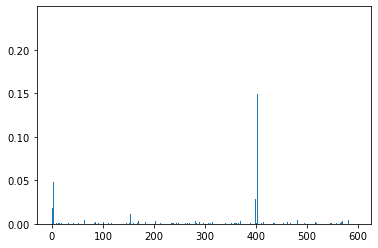

In [151]:
#Testing feature importances of RFR model
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
